In [6]:
import sys
import os
import numpy as np
import cv2
from plantcv import plantcv as pcv
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 5)
import numpy as np


In [7]:
# STEP 2: Set global variables
pcv.params.debug = 'plot'                                                           # Plot debug images to the notebook
rgb_img = r'C:\Users\Sajjan\Desktop\plant_google\2020-01-29_19h19_03.png'  # Image filename

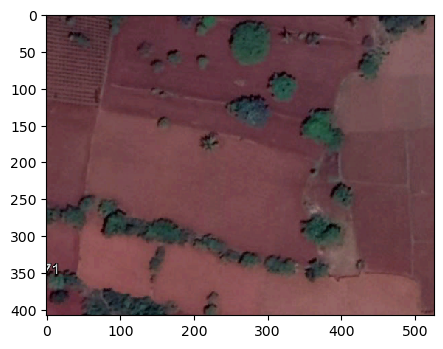

In [8]:
# STEP 3: Read RGB image and plot it to the notebook
# Inputs:
#    filename = name of image file
img, path, filename = pcv.readimage(rgb_img)  
debug = "plot"
device = 0

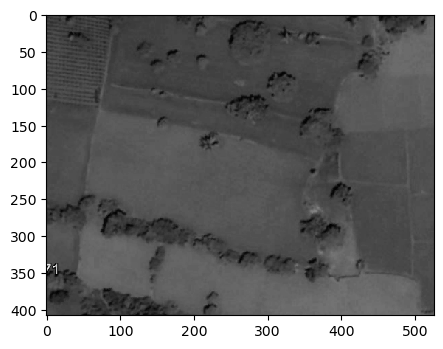

In [9]:
img_gray = pcv.rgb2gray(img)

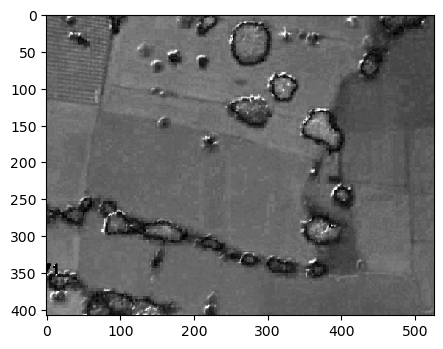

In [10]:
# STEP 4: Convert image from RGB colorspace to HSV colorspace
# Keep only the Saturation channel (grayscale)
# Inputs:
#    img     = image object, RGB colorspace
#    channel = color subchannel (h = hue, s = saturation, v = value/intensity/brightness)
img_gray_sat = pcv.rgb2gray_hsv(img, 's')

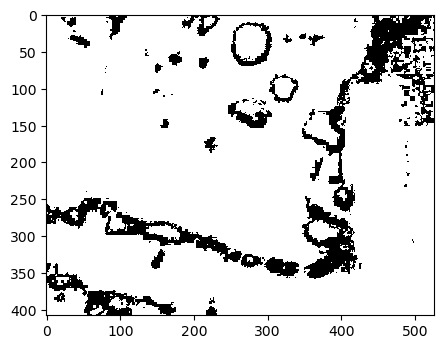

In [11]:
# STEP 5: Set a binary threshold on the Saturation channel image
# Inputs:
#    img         = img object, grayscale
#    threshold   = threshold value (0-255)
#    maxValue    = value to apply above threshold (usually 255 = white)
#    object_type = light or dark
#                  - If object is light then standard thresholding is done
#                  - If object is dark then inverse thresholding is done
img_binary = pcv.threshold.binary(img_gray_sat, 70, 255, 'light')                # optimal threshold values is 150 and 255 
#                                                       ^
#                                                       |
#                                                       adjust this value

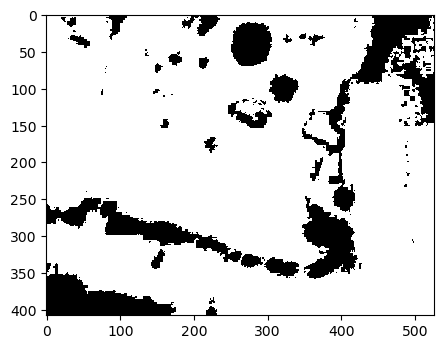

In [12]:
######################### this is mask #################################
# Inputs:
#    img    = image object, grayscale. img will be returned after filling
#    size   = minimum object area size in pixels (integer)

fill_image = pcv.fill(img_binary, 100000)
#                                  ^
#                                  |
#                               adjust this value

In [13]:
# crop all th black data in the image 
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

In [14]:
crop_img = crop_image(fill_image)

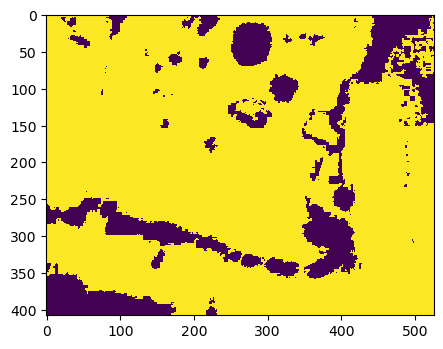

In [15]:
plt.imshow(crop_img)
clr = cv2.cvtColor(crop_img, cv2.COLOR_GRAY2BGR)

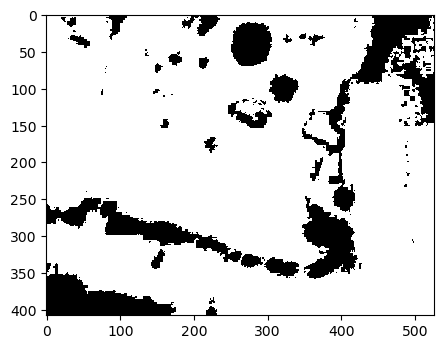

In [16]:
plt.imshow(clr)

In [ ]:
# Set up the detector with default parameters.
detector = cv2.SimpleBlobDetector()
 
# Detect blobs.
keypoints = detector.detect(fill_image)
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(fill_imgfr frage, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2.imshow("Keypoints", im_with_keypoints)


In [ ]:
# contours, hierarchy,_ = cv2.findContours(fill_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
_, contours, _ = cv2.findContours(fill_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contoursLen = len(contours)
plantsNumber = 0
filtered_conters = []
colorStep = int(200.0/contoursLen)
PERIMETER_LIMIT = 500
LINE_WIDTH = 2
  
for i in range(contoursLen):
    perimeter = cv2.arcLength(contours[i], True)
    if perimeter > PERIMETER_LIMIT:
        plantsNumber += 1
        r = cv2.boundingRect(contours[i])
        crop_img = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]]
#         cv2.imwrite(os.path.join(path,'roi'+str(i)+'.png'), crop_img)

In [ ]:
# cnts = imutils.grab_contours(contours)
# cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

In [ ]:
#     import cv2
#     #reading the image 
#     image = cv2.imread(rgb_img)
#     edged = cv2.Canny(image, 10, 250)
#     cv2.imshow("Edges", edged)
#     cv2.waitKey(0)
     
#     #applying closing function 
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
#     closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
#     cv2.imshow("Closed", closed)
#     cv2.waitKey(0)
     
#     #finding_contours 
#     _, contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
     
#     for c in cnts:
#     	peri = cv2.arcLength(c, True)
#     	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
#     	cv2.drawContours(image, [approx], -1, (0, 255, 0), 2)
#     cv2.imshow("Output", image)
#     cv2.waitKey(0)